# Lab 01: KNN (K-Nearest Neighbors)


A supervised classification algorithom using the k-nearest neighbors algorithm.

K-Dimensional Tree (KDT) is used to find the k-nearest neighbors.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# Load Iris Dataset

iris_data = load_iris()

iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
targets = pd.DataFrame(iris_data.target, columns=['target'])

print("Features Name: ", iris_data.feature_names)
print("Targets Name: ", iris_data.target_names)
print("Dataset Shape", iris.shape)

Features Name:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets Name:  ['setosa' 'versicolor' 'virginica']
Dataset Shape (150, 4)


In [15]:
print('Dataset: \n')
iris.head()

Dataset: 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
print("Target: \n")
targets.head()

Target: 



,target
0,0
1,0
2,0
3,0
4,0


In [17]:
x = iris_data.data
y = iris_data.target

In [18]:
# Split between train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# Preprocess & Train
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [20]:
# Predict
predictions = knn.predict(x_test)

print("Predictions: ", predictions)
print("Accuracy: ", accuracy_score(y_test, predictions))

Predictions:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy:  1.0


In [21]:
# Error Analysis for different K values
error_rate = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(f'Error rate for K={i:02} : {(error_rate[i - 1] * 100):.2f}%')

Error rate for K=01 : 0.00%
Error rate for K=02 : 0.00%
Error rate for K=03 : 0.00%
Error rate for K=04 : 0.00%
Error rate for K=05 : 0.00%
Error rate for K=06 : 0.00%
Error rate for K=07 : 3.33%
Error rate for K=08 : 0.00%
Error rate for K=09 : 0.00%
Error rate for K=10 : 0.00%
Error rate for K=11 : 0.00%
Error rate for K=12 : 0.00%
Error rate for K=13 : 0.00%
Error rate for K=14 : 0.00%
Error rate for K=15 : 0.00%
Error rate for K=16 : 0.00%
Error rate for K=17 : 0.00%
Error rate for K=18 : 0.00%
Error rate for K=19 : 0.00%
Error rate for K=20 : 0.00%
Error rate for K=21 : 0.00%
Error rate for K=22 : 0.00%
Error rate for K=23 : 0.00%
Error rate for K=24 : 0.00%
Error rate for K=25 : 0.00%
Error rate for K=26 : 0.00%
Error rate for K=27 : 0.00%
Error rate for K=28 : 0.00%
Error rate for K=29 : 0.00%
Error rate for K=30 : 0.00%
Error rate for K=31 : 0.00%
Error rate for K=32 : 0.00%
Error rate for K=33 : 0.00%
Error rate for K=34 : 0.00%
Error rate for K=35 : 0.00%
Error rate for K=36 

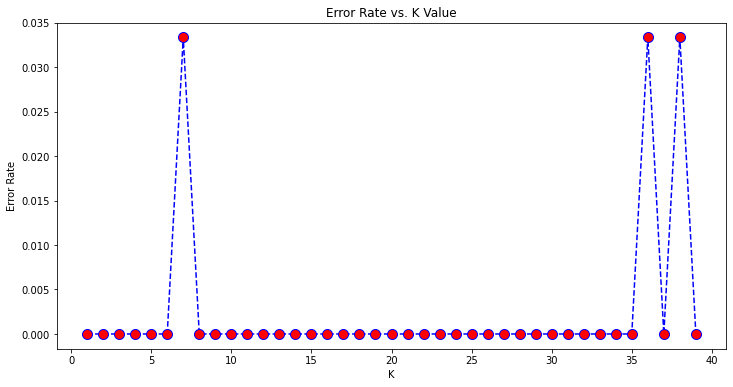

In [22]:
# Visualizing Error Rate vs K Value for KNN using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(
    range(1, 40), 
    error_rate, 
    color='blue', 
    linestyle='dashed', 
    marker='o', 
    markerfacecolor='red', 
    markersize=10
)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()